# Logistic Regression
Logistic regression is based on the **sigmoid funtion**:
$
    g(z) = \frac{1}{1+e^{-z}}
$

If z > 0, g(z) >0.5 then y = 1. Otherwise y = 0. 


We can think about how this work as projecting some point in X domain into the sigmoid domain through a bunch of operation determined by $\theta$. The Logistic regression for finding the best suitable $\theta$ that makes points labelled as y=1 locate in the right and other points (y=0) locate in the left.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification,make_circles

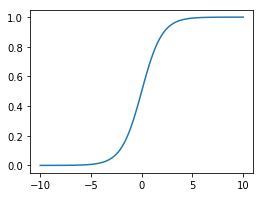

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(-10,10,100)
g = sigmoid(z)

plt.figure(figsize=(4,3))
plt.plot(z,g,'-')
plt.show()

### cost function
The cost function in logistic regression is $J(\theta)= -\frac{1}{m}\sum [ylog(a) + (1-y)log(1-a)]$, where $a = sigmoid(\theta^T X)$. The cost function used in linear regression does not work for logistic regression because it will give a **non-convex** function. 

The gradient of $\theta$ is, 

$dz = a(1-a)(\frac{y}{a} + \frac{1-y}{1-a}) = (a-1)y + a(1-y) = ay-y+a-ay = a-y$, $d\theta = X^T dz$


Next, we implement the gradient descent of logistic regression from scratch using numpy library.

In [64]:
def lr_model(X,y,learning_rate=0.1,iteration_num=100,print_cost_interval=10):
    
    m,n_theta = X.shape
    np.random.seed(2)
    theta = np.random.randn(n_theta,1)
    
    for i in range(iteration_num):
        z = np.dot(X,theta)
        a = sigmoid(z)
        
        cost = -np.mean(y*np.log(a) + (1-y)*np.log(1-a))
        grad = 1/m*np.dot(X.T,a-y)
        
        # update
        theta = theta - learning_rate*grad
        
        if i%print_cost_interval == 0:
            print('cost after {} iterations: {}'.format(i,cost))
    
    return theta

Now we use our implemented function *lr_model* to solve a binary classification problems as the data shown below.

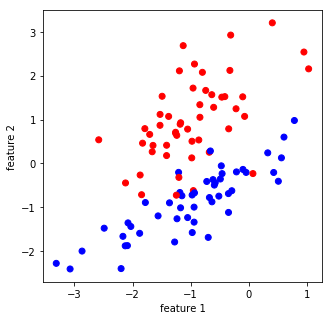

In [133]:
X,y =make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                         n_classes=2, n_clusters_per_class=1,
                         random_state=20)

Y = y[:,np.newaxis]

plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.get_cmap('bwr'))
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [134]:
theta = lr_model(X,Y,learning_rate=0.1,iteration_num=1000,print_cost_interval=100)

cost after 0 iterations: 0.7592197646045717
cost after 100 iterations: 0.30464618243296426
cost after 200 iterations: 0.27000101091881556
cost after 300 iterations: 0.2567944924506903
cost after 400 iterations: 0.2500315530474706
cost after 500 iterations: 0.24604716868279147
cost after 600 iterations: 0.2434978752587772
cost after 700 iterations: 0.24177576564537046
cost after 800 iterations: 0.2405669644673041
cost after 900 iterations: 0.239693999762177


#### Linear decision boudary
There is analytic expression of the linear decision boudary, which is when $\theta^T*X=0$.
Therefore, we can calculate the exact decision boundary of a linear decision boudary and plot it.

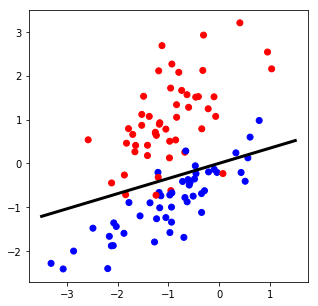

In [135]:
b1 = np.linspace(-3.5,1.5,100)
b2 = -(0 + theta[0]*b1)/theta[1]
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.get_cmap('bwr'))
plt.plot(b1,b2,'k-',linewidth=3)
plt.show()

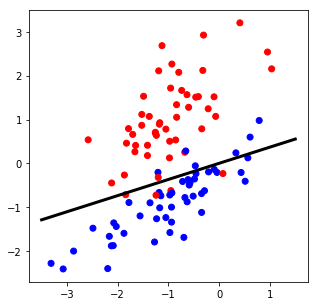

In [129]:
classifier = LogisticRegression(C=100,solver='lbfgs',penalty='l2',fit_intercept=False)
# note : super large C means no penalty
classifier.fit(X,y)

# analytical decision boundary using coef_ - not a generalized method
b1 = np.linspace(-3.5,1.5,100)
b2 = -(classifier.intercept_ + classifier.coef_[0,0]*b1)/classifier.coef_[0,1]

plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.get_cmap('bwr'))
plt.plot(b1,b2,'k-',linewidth=3)
plt.show()

#### Nonlinear decision boundary
There is no analytic solution of a nonlinear decision bounday, but we can plot the numerical decision boundary. When using sklearn build-in logistic regression classification function, *classifier.decision_function(X)* returns the distance of a sample to the decision boundary/hyperplane. The level-zero contour is the decision boundary.

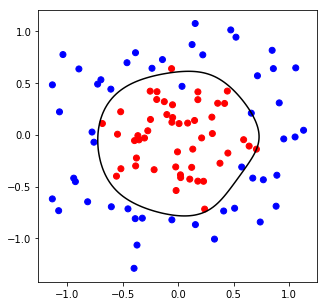

In [137]:
X, y = make_circles(n_samples=100,
                    noise = 0.2,
                    factor = 0.4,
                    random_state=1)

Y = y[:,np.newaxis]

## High-order features of f1,f2, such as f1*f2,f1^2,f1*f2^2
polynomial_features = PolynomialFeatures(degree=6,include_bias=False)
X_poly = polynomial_features.fit_transform(X)

classifier = LogisticRegression(C=1000,solver='lbfgs',max_iter=1e4)
classifier.fit(X_poly,y)

# numerical decision boundary / region using predict
x1_test = np.linspace(-1,1,100)
x2_test = np.linspace(-1,1,100)

X1_test,X2_test = np.meshgrid(x1_test,x2_test)
X_test = np.hstack((X1_test.flatten().reshape(-1,1),X2_test.flatten().reshape(-1,1)))

X_test_poly = polynomial_features.transform(X_test)

p_test = classifier.decision_function(X_test_poly)
P_test = p_test.reshape(X1_test.shape)

#plt.pcolormesh(X1_, X2_, P, cmap=plt.cm.Paired)
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.get_cmap('bwr'))
plt.contour(X1_test,X2_test,P_test,[0],colors='k')
plt.show()

#### Multiclass problems (more than two labels)
An example is the handwritten recogition from 0 to 9. The labels here is not only 0 or 1 instead 0,1,2,3,4,5,6,7,8,9.
There are total 10 labels in this problem.

*classifier = LogisticRegression(max_iter=1000,C=1,fit_intercept=True,multi_class='multinomial',solver='lbfgs')*
